<a href="https://colab.research.google.com/github/JuanCReyes1/DataScienceinPython/blob/master/FastFourierTransform_DiscreteDynamicalSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Fast Fourier Transform and Discrete Dynamical Systems
## Juan C. Reyes - Dalhousie University 
###Nov.5, 2019.

The Fourier transform is a mathematical transform with many applications in image processing, mathematics, engineering, and physics.

The continuous Fourier transform is defined by \\
$F(\omega) = \int_{-\infty}^{\infty} f(t) e^{-2\pi i \omega t} dt$, \\
which is useful in transforming a mathematical function of time, $f(t)$ into a function of frequency, $F(\omega)$.\
The new function is referred to as the Fourier spectrum of the function $f$.

The continuous Fourier transform is useful for transforming infinetely long time-domain signals into a continuous spectrum of an infinite number of sinusoidal curves. \\

In many cases, the data we are working with deals with discretely sampled signals at constant intervals, rather than continuous smooth signals. For such discrete data, we apply the Discrete Fourier Transform.


Like all my previous notes, I reccomend opening this Jupyter Notebook in the 'Playground' located at the top left hand corner of this page. In this mode you are allowed to tweak and execute my code chunks to let you test programs as you wish.



First we begin by importing all of the Python packages which will be necessary for conducting our analysis. We will be using the scipy.fftpack package to implement our Discrete Fast Fourier Transforms as well as Matplotlib to generate graphs.

You may run this code by pressing the play button on the left.

In [0]:
import numpy as np
from scipy.fftpack import fft #package that contains the discrete fast fourier transform
import matplotlib.pyplot as plt #graphing package


The discrete dynamical system we will be working with in this Jupyter Notebook lesson are the following two equations, \
$ x_{n+1}= 1+\beta x_{n} - \alpha y^2_{n}$ \\
$y_{n+1} = x_{n}$ \\



With parameter values, \\
$\alpha = 1 $ \\
$\beta = 0.05$ \\


By looping over the equations $n = 50,000$ times beggining with the initial condition $X_{0}$ and using our newly calculated value as the initial condition of the next iteration, **we obtain a discrete temporal sequence characterizing the evolution of the state of the dynamical system.**
We store this sequence into an array which we will access later when we wish to visualize the dynamic evolution of our system graphically. \


Our analysis works great for a fixed set of parameters, providing us with a solution of the temporal evolution of the system in *phase space* or the *state space*. This 'space' is an abstract space quite unlike the three dimensional space in which we occupy. Every point in this abstract space characterizes a unique ***state*** for our system. Understanding the *flow diagrams* or *time evolution* of these states in this space characterizes a complete description of the *behaviour* or *time evolution* of the system *back in our three dimensional space*. We have found a way of relating an abstract mathematical space to our physical world. 


So, the set of parameters in our model describe *characteristics of the system* which are usually global characteristics of our system. In the case of predator-prey dynamics, we saw that the parameters in the model described the interaction of two species given specific mortality, reproduction, and feeding rates. The theory of Dynamical Systems is a great tool for allowing us to also investigate the temporal evolution of a system under a *variation* of the parameters. By varying the system's parameters we investigate how changing the *characteristics of the system* affect the evolution of the system itself.
For now, I only want to show some interesting results which occur as we vary just *one* of the system's parameter values ($\beta$). As it turns out, the results we obtain from varying our system's parameters will yield results which are synonymous to other systems in our everyday experience. The results associated with an equation describing the dynamics of a system refer to the properties of the system itself. Thus, biological systems and physical systems display steady states, oscillations, bifurcations, and chaos, as do the equations that describe the naturally occurring systems.

In [0]:
  #Define system parameters
  a, b = 1,0.05
  #Define number of iterations
  n = 50000

Computationally, we create a set of arrays $(X,Y)$ to store the time evolution of the state of the systems which comprise the Discrete Dynamical System $\ x_{n+1},y_{n+1}$ and their parameters $\alpha , \beta$. **A Discrete Dynamical Systems can be simply thought of as a combined set of 'rules' which 'map' out the time evolution of our system of interest**. We are often interested in learning in which region of our *state space* the system likes to frequent the most. This gives direct insight as to how our system evolves in reality. This is when graphing our system and obtaining a visual guide of the evolution becomes very useful.\
Every system needs to start somewhere, and so an initial condition is absolutely necessary to unfold our discrete dynamical system. If there is no beggining, then there is no unfolding in time. The initial condition simply defines where our system begins in the state space and how it unfolds over time in this space after it has been set into motion.\
 Our aim is to plot the evolution of our system into a two-dimensional state space to get a visual cue of which regions of the phase space the system 'frequents' more often. \\
We define the intitial condition (starting point) of our system in our state space as:
$X_{0} = (\frac{1-\beta}{2},\frac{1-\beta}{2})$. \\
 Note that our system's starting point is dependent on the value of the parameter $\beta$.

 ## Now we will program our Discrete Dynamical System!


In [0]:
# Define a function for the 2-dimensional discrete dynamical system
def map_2d(X):
  x,y = X 
  ### The Discrete Dynamical System ###
  #x states
  xn = 1 + b*x - a*y**(2) 
  #y states
  yn = x

  return(xn,yn)

#Define initial conditions
X0= [(1-b)/2 , (1-b) / 2]

#Initialize arrays to store the iterated maps
X, Y = [] , []

###Loop through the map n times and store it in arrays. 
for i in range(n):
  xn, yn = map_2d(X0)
  X, Y = X + [xn], Y + [yn]
  X0 = [xn,yn]


## Now lets use Matplotlib to graph the iterative map...

$\alpha = 1 $ \\
$\beta = 0.05$ \\

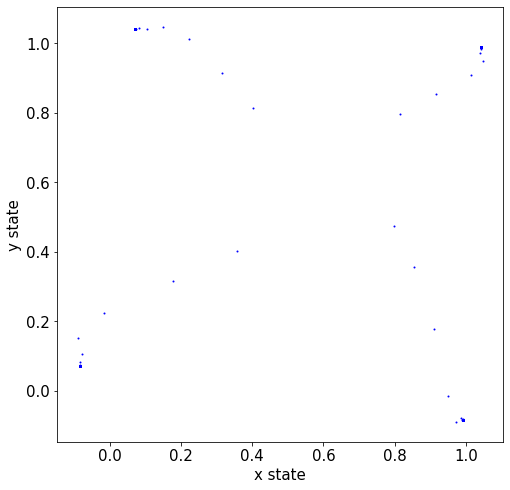

In [0]:
#Define figure to store graph of size 8x8.
fig , ax = plt.subplots(figsize = (8,8))
#Define scatterplot to display the distribution of our sequence values
ax.scatter(X,Y, color = 'blue' , s = 1)
plt.xlabel('x state' , fontsize = 15)
plt.ylabel('y state' , fontsize = 15)
plt.tick_params(labelsize = 15)


This is an example of periodic dynamic behaviour. We can see our system has a very small set of states (points on the graph) to which it can travel to. Note that the state distribution is not continuous or smooth in our state space. The system's state is cycling amongst the few points we see on the graph above.

## Fast Fourier Transform: Power Spectrum

The next graph illustrates an application of the Fast Fourier Transform for finding the power spectrum of the time series data we generated. We will see that the power spectrum will prove useful in distinguishing between periodic, quasiperiodic, and chaotic behaviour of certain dynamical systems from a broad range of fields.

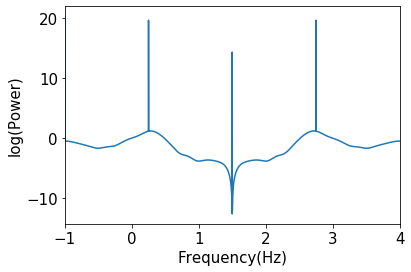

In [0]:
fig2 = plt.figure()
f = np.linspace(-1,4,n)

#power spectrum 
power = np.abs(fft(X)**2)
power = np.log(power)
plt.plot(f,power)
plt.xlim(-1,4)
plt.xlabel('Frequency(Hz)', fontsize =15)
plt.ylabel('log(Power)', fontsize = 15)
plt.tick_params(labelsize=15)
plt.show()


The power spectrum plotted for a periodic signal has discrete peaks at the harmonics and subharmonics of the system.

Now we will repeat the same procedure as before and iterate the same dynamical system, but now we will look at the response of the system's behaviour under the variation of the parameter $\beta$ to 0.12.


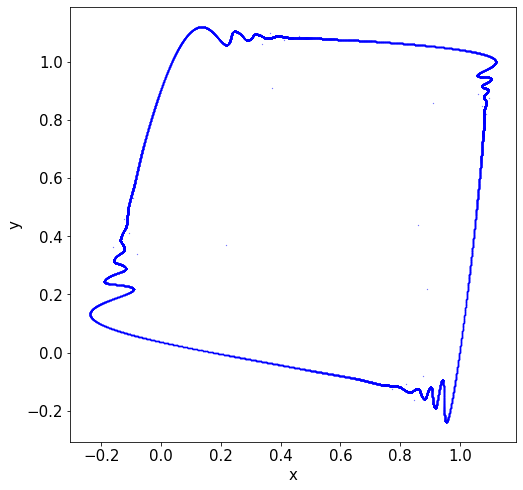

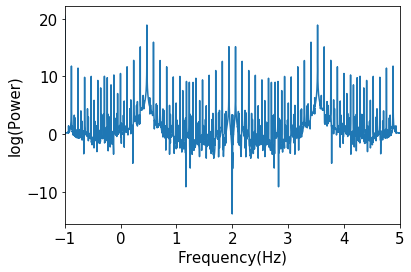

In [0]:
#New parameters
a , b = 1, 0.12  #The only thing we are changing in this code is the value of beta.
n = 50000

#Reinitialize initial condition
X0 = [(1-b) / 2, (1 - b) / 2]

#Reinitialize our arrays to store system solutions
X,Y = [] , []

#Iterate the maps and store them into X,Y arrays
for i in range(n):
    xn, yn = map_2d(X0)
    X, Y = X + [xn], Y + [yn]
    X0 = [xn, yn]
    
#Plot system    
fig, ax = plt.subplots(figsize = (8,8))

ax.scatter(X,Y,color = 'blue', s = 0.05)
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.tick_params(labelsize = 15)

#Plot power spectrum
fig2 = plt.figure()
f = np.linspace(-1, 5,n)
power = np.abs(fft(X)**2)
power =np.log(power)
plt.plot(f,power)
plt.xlim(-1,5)
plt.xlabel('Frequency(Hz)', fontsize = 15)
plt.ylabel('log(Power)',fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

By simply varying our parameter from $\beta=0.05$ to $\beta=0.12$ we immediately notice an abrupt change in our system's behaviour. Instead of discretized periodic solutions we obtain a system that displays irregular periodicity. This behaviour is known as *quasiperiodicity*. This behaviour is a pattern of recurrence with a component of unpredictability that does not allow for precise measurement. 
Note the usefulness of the fast fourier transform, once again allowing us to dissect the discrete peaks of the time series at the harmonics and subharmonics.  

We perform this procedure one last time but now we vary $\beta=0.12$ to $\beta=0.3$ and what we will see is an example of chaotic behaviour.

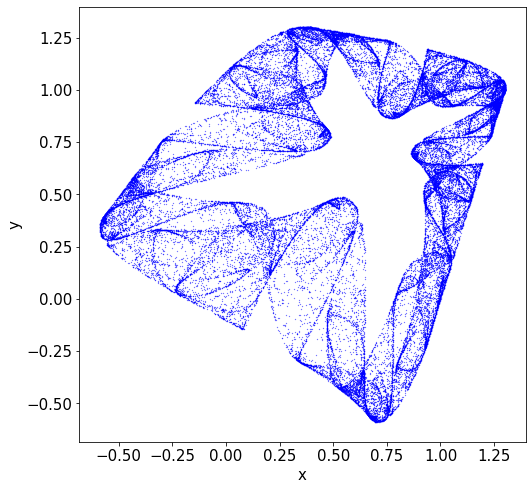

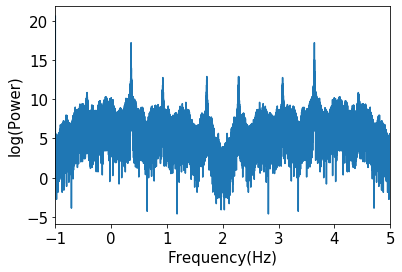

In [0]:
#New parameters
a , b = 1, 0.3
n = 50000

#Reinitialize initial condition
X0 = [(1-b) / 2, (1 - b) / 2]

#Reinitialize our arrays to store system solutions
X,Y = [] , []

#Iterate the maps and store them into X,Y arrays
for i in range(n):
    xn, yn = map_2d(X0)
    X, Y = X + [xn], Y + [yn]
    X0 = [xn, yn]
    
#Plot system    
fig, ax = plt.subplots(figsize = (8,8))

ax.scatter(X,Y,color = 'blue', s = 0.05)
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.tick_params(labelsize = 15)

#Plot power spectrum
fig2 = plt.figure()
f = np.linspace(-1, 5,n)
power = np.abs(fft(X)**2)
power =np.log(power)
plt.plot(f,power)
plt.xlim(-1,5)
plt.xlabel('Frequency(Hz)', fontsize = 15)
plt.ylabel('log(Power)',fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

We can see that our system's behaviour in our state space is rather strange looking and might even appear 'random' at first. However, applying the same Fast Fourier Transform technique for this chaotic signal we actually reveal a 'broadband' power spectrum rather than the discrete peaks we saw for each harmonic and subharmonics.

As we can see, chaotic behaviour is harder to analyze but by means of a Fast Fourier Transform we were able to distinguish between several types of behaviour across different time series representing different systems. This will prove extremely valuable when inspecting different types of time series datasets. 
